# Objetivo do MVP_002:

- **[✕]** Construir um arquivo pdf com os memos e notas do dia anterior;
- **[✕]** Enviar arquivo pdf por e-mail;
- **[✓]** Implementar secret da senha do e-mail; 


# Importações

## Bibliotecas

In [ ]:
#!pip install --upgrade pdf_reports
#!pip install reportlab
#!pip install python-dotenv

In [6]:
import os

import pandas as pd
import numpy as np

from reportlab.pdfgen import canvas
from dotenv import load_dotenv

import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.application import MIMEApplication

## Configurações do Servidor SMTP

In [13]:
# Carregando secrets definidos pelo arquivo .env
load_dotenv()

# Configurações do servidor SMTP do Gmail
smtp_server = "smtp.gmail.com"
smtp_port = 587
smtp_user = 'pleasecallmekindness@gmail.com'
smtp_password = os.getenv("EMAIL_PASSWORD")

# Definição de um dicionário contendo as configuções SMTP
smtp_config = {"server": smtp_server,
               "port": smtp_port,
               "user": smtp_user,
               "password": smtp_password}

# Destinatário
destinatario = 'matheuschomem@hotmail.com'

In [14]:
print(smtp_password)

geul vxzi bdib bwdw


## Arquivos

In [1]:
# Definição do caminho dos dataframes
morning_path = "/content/morning_routine_v2.xlsx"
night_path = "/content/night_routine_v2.xlsx"

In [28]:
# Criação dos dataframes diurno e noturno a partir dos caminhos definidos
sun_df = pd.read_excel(morning_path)
moon_df = pd.read_excel(night_path)

# Funções

### send_email





> Função criada que tem como resultado o envio do e-mail do remetende estabilecido para o destinatário estabelecido. Tem como parâmetros:
- `smtp_config`: Dicionário definido com o remetente e as variáveis necessárias para realizar o login para o envio do e-mail. Segue a correspondencia de chave-valor:
    - `server`: Servidor da bilioteca (`smtp.gmail.com`);
    - `port`: Número da porta (`587`);
    - `user`: E-mail do remetente, utilizado para o login;
    - `password`: Senha do e-mail do remetente, utilizado para o login;
- `destinatario`: E-mail do destinatário
- `assunto`: Assunto do e-mail;
- `corpo_email`: Informações do corpo do e-mail, são passadas para o `MIMEText` na execução da função;
- `anexo_nome`: Por default, considerada como None. Caso haja anexo, é inserido através desse parâmetro.

In [ ]:
def send_email(smtp_config, destinatario, assunto:str, corpo_email, anexo_nome=None):
    # Passando informações da lista parametrizada
    smtp_server = smtp_config["server"]
    smtp_port = smtp_config["port"]
    smtp_user = smtp_config["user"]
    smtp_password = smtp_config["password"]
    remetente = smtp_config["user"]

    # Construa a mensagem
    mensagem = MIMEMultipart()
    mensagem['From'] = remetente
    mensagem['To'] = destinatario
    mensagem['Subject'] = assunto

    # Adicione o corpo do e-mail
    mensagem.attach(MIMEText(corpo_email, 'plain'))

    # Adicione anexo, se fornecido
    if anexo_nome:
        with open(anexo_nome, 'rb') as arquivo:
            anexo = MIMEText(arquivo.read())
            anexo['Content-Disposition'] = f'attachment; filename={anexo_nome}'
            mensagem.attach(anexo)

    # Conecte-se ao servidor SMTP e envie o e-mail
    with smtplib.SMTP(smtp_server, smtp_port) as server:
        server.starttls()
        server.login(smtp_user, smtp_password)
        server.sendmail(remetente, destinatario, mensagem.as_string())

    print('E-mail enviado com sucesso!')

# Tratamento de Dados

## Renomeação de Campos

In [30]:
# Definição do dicionário com os novos nomes dos campos
map_columns = {
    moon_df.columns[9]: "wis_memo",
    moon_df.columns[20]: "con_memo",
    moon_df.columns[40]: "str_memo",
    moon_df.columns[53]: "cha_memo",
    moon_df.columns[57]: "fth_memo"
}

# Aplicação do dicionário, renomeado os campos selecionados
moon_df.rename(columns=map_columns, inplace=True)

# Carregamento e Envio

## Construção do E-mail

In [62]:
# Exemplo de uso da função
"""
send_email(smtp_config=smtp_config,
           destinatario='matheuschomem@hotmail.com',
           assunto='Resultado do Script Python',
           corpo_email='teste')
"""

E-mail enviado com sucesso!


ERROR:weasyprint:Relative URI reference without a base URI: <img src="/content/grafico.png">


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

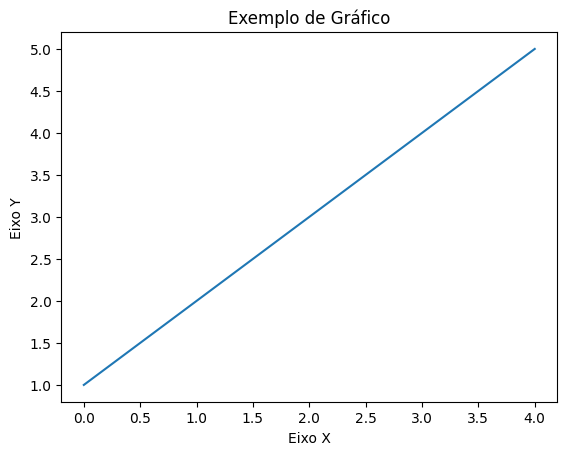

In [74]:
from pdf_reports import write_report

# Dados do gráfico (exemplo)
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4, 5])
plt.title('Exemplo de Gráfico')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.savefig('./grafico.png')

template = """
<!DOCTYPE html>
<html>
<head>
    <title>Relatório em PDF</title>
</head>
<body>
    <h1>Relatório em PDF</h1>
    <p>Este é um exemplo de relatório em PDF com texto e gráfico.</p>
    <img src='./grafico.png' width='80%'>
</body>
</html>
"""

# Gera o relatório em PDF
write_report(template, '/content/relatorio_pdf_reports2.pdf')

from google.colab import files
files.download('/content/relatorio_pdf_reports2.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

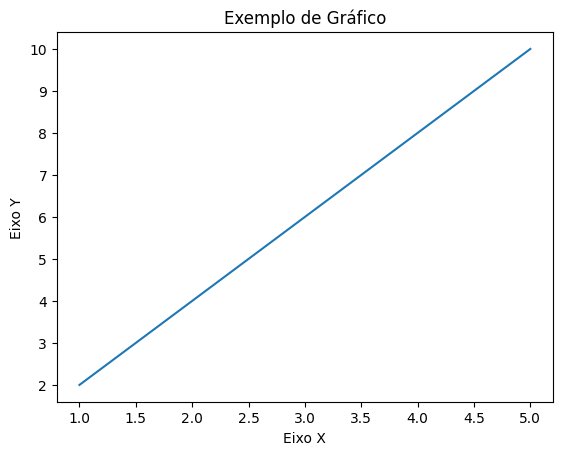

In [75]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
import matplotlib.pyplot as plt

# Dados do gráfico (exemplo)
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.plot(x, y)
plt.title('Exemplo de Gráfico')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

# Salva o gráfico como imagem
plt.savefig('/content/grafico.png')

# Cria um arquivo PDF e desenha o gráfico nele
pdf_path = '/content/relatorio_pdf_reports3.pdf'
c = canvas.Canvas(pdf_path, pagesize=letter)
c.drawString(72, 800, 'Relatório em PDF')
c.drawImage('/content/grafico.png', 72, 500, width=400, height=300)
c.save()

# Baixa o PDF gerado
from google.colab import files
files.download(pdf_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

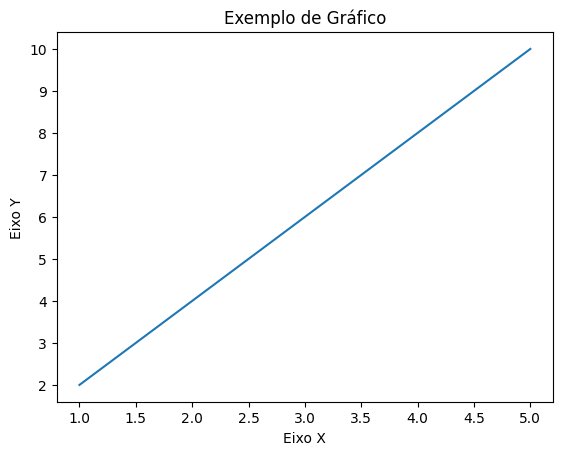

In [76]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
import matplotlib.pyplot as plt

# Dados do gráfico (exemplo)
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.plot(x, y)
plt.title('Exemplo de Gráfico')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

# Salva o gráfico como imagem
plt.savefig('/content/grafico.png')

# Cria um arquivo PDF e desenha o gráfico e o texto nele
pdf_path = '/content/relatorio_pdf_reports4.pdf'
c = canvas.Canvas(pdf_path, pagesize=letter)

# Adiciona título
c.setFont("Helvetica-Bold", 16)
c.drawString(72, 800, 'Relatório em PDF com Gráfico')

# Adiciona cabeçalho
c.setFont("Helvetica", 12)
c.drawString(72, 780, 'Cabeçalho do Relatório')

# Adiciona texto de exemplo
texto_exemplo = (
    "Este é um exemplo de relatório em PDF com um gráfico, "
    "um título, um cabeçalho e um texto de exemplo."
)
c.drawString(72, 750, texto_exemplo)

# Adiciona o gráfico
c.drawImage('/content/grafico.png', 72, 500, width=400, height=300)

# Salva o PDF
c.save()

# Baixa o PDF gerado
from google.colab import files
files.download(pdf_path)
